### **Creating Synthetic Data from scratch**

In [ ]:
!pip install numpy
import numpy as np

### **Standardization**

In [ ]:
import numpy as np
from numpy import dot, log
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

class LogisticRegression:

    X, y = make_classification(n_features=4, n_classes=2)
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize(self, X):
        weights = np.zeros((np.shape(X)[1]+1, 1))
        X = np.c_[np.ones((np.shape(X)[0], 1)), X]
        return weights, X

    def standardize(self, X_tr):
        for i in range(np.shape(X_tr)[1]):
            X_tr[:, i] = (X_tr[:, i] - np.mean(X_tr[:, i])) / np.std(X_tr[:, i])

    def fit(self, X, y, alpha=0.001, iter=400):
        weights, X = self.initialize(X)
        cost_list = np.zeros(iter,)

        def cost(theta):
            z = dot(X, theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1+cost0))/len(y)
            return cost

        for i in range(iter):
            weights = weights - alpha * dot(X.T, self.sigmoid(dot(X, weights)) - np.reshape(y, (len(y), 1)))
            cost_list[i] = cost(weights)
        self.weights = weights

        return cost_list

    def predict(self, X):
        z = dot(self.initialize(X)[1], self.weights)
        lis = []

        for i in self.sigmoid(z):
            if i > 0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

obj1 = LogisticRegression()
obj1.standardize(obj1.X_tr)
obj1.standardize(obj1.X_te)

model = obj1.fit(obj1.X_tr, obj1.y_tr)
y_pred = obj1.predict(obj1.X_te)
y_train = obj1.predict(obj1.X_tr)

f1_scratch = f1_score(obj1.y_te, y_pred)
print("F1 Score:", f1_scratch)


F1 Score: 0.8


<ipython-input-14-5653e9702e2c>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_list[i] = cost(weights)


## **Using sklearn**

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features = 4,n_classes=2)
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

# Import Logistic Regression and determine F1

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression().fit(X_tr,y_tr)
y_pred= model.predict(X_te)

print(f1_score(y_pred,y_te))

1.0


F1 Score Comparison



*   From Scratch Model - 0.8
*   Using sklearn Model - 1



<ipython-input-31-301a2a458a35>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


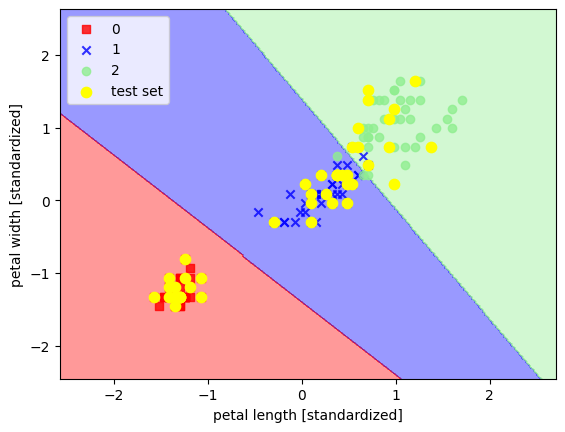

In [ ]:

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='Yellow',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,
                      y_combined, classifier=lr,
                      test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Conclusion : The plot suggests a positive correlation between petal length and width, but there is overlap between the species.

**LOADING IRIS DATASET**

**LOADING IRIS DATASET**

## Without Regularization

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error , r2_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import KFold , cross_val_score , RepeatedStratifiedKFold , GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
from sklearn import datasets
import numpy as np
iris= datasets.load_iris()
X= iris.data
y= iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
X_train_std= sc.transform(X_train)
X_test_std= sc.transform(X_test)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state=42,multi_class='auto')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

accuracy_no_reg= accuracy_score(y_test,y_pred)
print(f"Accuracy Score without Regularization : {accuracy_no_reg}")

Accuracy Score without Regularization : 0.9777777777777777


## Regularization

In [7]:
X= iris.data[:,[2,3]]
y= iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
sc.fit(X_train)

X_train_std= sc.transform(X_train)
X_test_std= sc.transform(X_test)


from sklearn.linear_model import LogisticRegression

#regulation


weights , params = [] , [] 

for c in np.arange(0,5): 
    lr=LogisticRegression(C=10**c , random_state=0)
    lr.fit(X_train_std , y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights=np.array(weights)

    

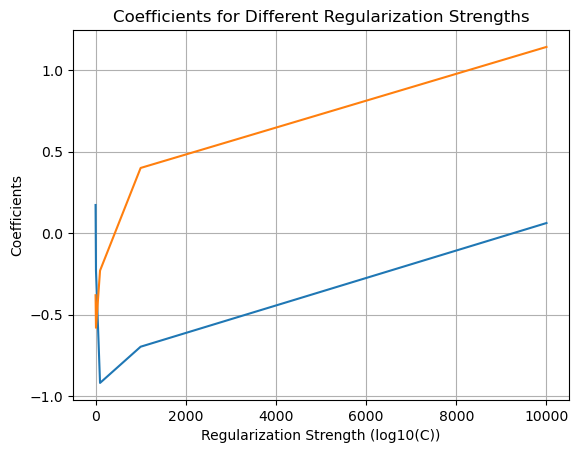

In [13]:
import matplotlib.pyplot as plt
#time pass
# Plot the coefficients for each regularization strength
plt.plot(params, weights)
plt.xlabel('Regularization Strength (log10(C))')
plt.ylabel('Coefficients')
plt.title('Coefficients for Different Regularization Strengths')
plt.grid()
plt.show()

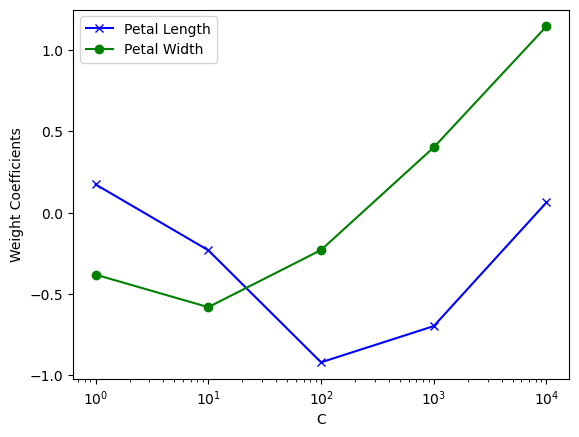

In [12]:
import matplotlib.pyplot as plt

plt.plot(params, weights[:, 0], 'bx-', label='Petal Length')  # 'bx-' means blue color, x marker, solid line
plt.plot(params, weights[:, 1], 'go-', label='Petal Width')   # 'go-' means green color, circle marker, solid line

plt.xlabel('C')                                               # Label for x-axis
plt.ylabel('Weight Coefficients')                             # Label for y-axis
plt.legend()                                                  # Show legend
plt.xscale('log')                                             # Set x-axis to logarithmic scale

plt.show()                                                    # Display the plot


From the graph we understand that at C=100 , weight coefficients are minimized

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(C=100,random_state=42,multi_class='auto')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

accuracy_reg= accuracy_score(y_test,y_pred)
print(f"Accuracy Score with Regularization : {accuracy_reg}")

Accuracy Score with Regularization : 0.9777777777777777


Conclusion: Result of Logistic Regression Model with and without Regularization are close as the IRIS dataset is small

However, over large datasets, regularization improves model accuracy by understanding weight coefficients

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate some sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
logreg = LogisticRegression()

# Define the hyperparameters grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with best parameters on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Test Accuracy: 0.865


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model